In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/01_cleaned_data.csv")
print(df.isna().sum())
X = df.drop("target", axis=1)
y = df["target"]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print("Total variance explained:", explained_variance.sum())

[0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.03526033 0.03157598
 0.02721797]
Total variance explained: 1.0


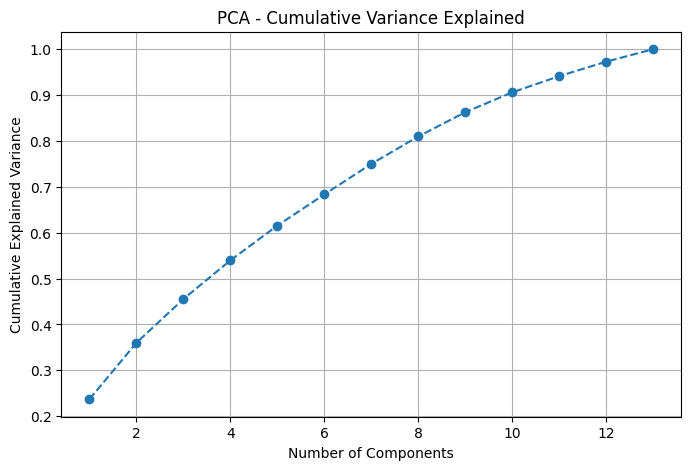

In [5]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1),
         explained_variance.cumsum(),
         marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid()
plt.show()

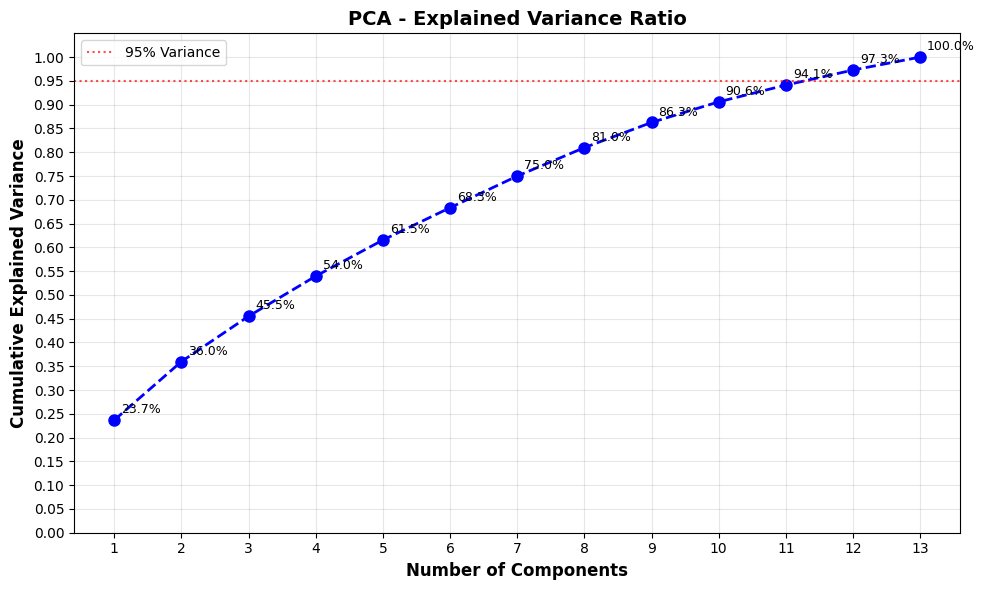

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), 
         marker='o', linestyle='--', linewidth=2, markersize=8, color='blue')

plt.axhline(y=0.95, color='red', linestyle=':', alpha=0.7, label='95% Variance')

plt.xlabel("Number of Components", fontsize=12, fontweight='bold')
plt.ylabel("Cumulative Explained Variance", fontsize=12, fontweight='bold')
plt.title("PCA - Explained Variance Ratio", fontsize=14, fontweight='bold')

plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(range(1, len(explained_variance)+1))

plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)  

for i, v in enumerate(explained_variance.cumsum()):
    plt.annotate(f'{v:.1%}', 
                 xy=(i+1, v), 
                 xytext=(5, 5), 
                 textcoords='offset points',
                 fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


In [7]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [8]:
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(12)])
X_pca_df["target"] = y.values
X_pca_df.to_csv("../data/02_data_pca.csv", index=False)